# Solving CIFAR 10 using Keras

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

This notebook attempts to classify those images.

In [1]:
# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
#Declaring Variables
batch_size = 32 #Smaller Batch size means more updates in one epoch

num_classes = 10 
epochs = 100 #Repeat 100 times

In [3]:
#Load the Dataset 
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 22s 0us/step


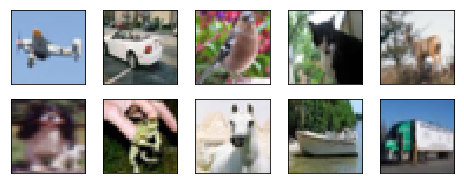

In [4]:
# Print 10 random images 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2,5,1 + i, xticks=[],yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    #ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

We now need to normalize the pixel values. This means to turn them from in the range of 0-255 to be between 0 and 1. 

In [5]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [6]:
#Defining our model 
def base_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(521))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
    
    #Train model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

cnn_n = base_model()
cnn_n.summary()
 
#Fit model
 
cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)     
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
__________

50000/50000 [==============================] - 19s 382us/step - loss: 2.3089 - acc: 0.0994 - val_loss: 2.3053 - val_acc: 0.1000
Epoch 40/100
50000/50000 [==============================] - 19s 381us/step - loss: 2.3088 - acc: 0.1003 - val_loss: 2.3037 - val_acc: 0.1000
Epoch 41/100
50000/50000 [==============================] - 19s 382us/step - loss: 2.3086 - acc: 0.1012 - val_loss: 2.3060 - val_acc: 0.1000
Epoch 42/100
50000/50000 [==============================] - 19s 381us/step - loss: 2.3091 - acc: 0.0984 - val_loss: 2.3068 - val_acc: 0.1000
Epoch 43/100
50000/50000 [==============================] - 19s 381us/step - loss: 2.3088 - acc: 0.0980 - val_loss: 2.3104 - val_acc: 0.1000
Epoch 44/100
50000/50000 [==============================] - 19s 383us/step - loss: 2.3088 - acc: 0.0987 - val_loss: 2.3123 - val_acc: 0.1000
Epoch 45/100
50000/50000 [==============================] - 19s 383us/step - loss: 2.3090 - acc: 0.0974 - val_loss: 2.3086 - val_acc: 0.1000
Epoch 46/100
50000/50000 [

50000/50000 [==============================] - 19s 381us/step - loss: 2.3086 - acc: 0.0996 - val_loss: 2.3071 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 19s 382us/step - loss: 2.3086 - acc: 0.1007 - val_loss: 2.3084 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 19s 382us/step - loss: 2.3077 - acc: 0.1036 - val_loss: 2.3095 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 19s 381us/step - loss: 2.3085 - acc: 0.1005 - val_loss: 2.3093 - val_acc: 0.1000


# 6 Layer Model
We will now create a 6 layer model to compare with the 4 layer model created above. 

In [ ]:
def six_layer():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
    
    # Train model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
cnn_n6 = six_layer()
cnn_n6.summary()
 
# Fit model
 
cnn6 = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

# Plotting our accuracy and loss

[]

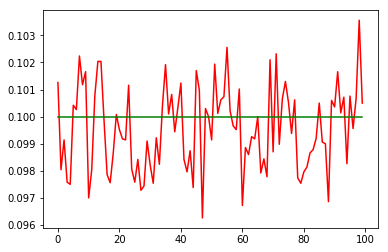

In [7]:
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.plot()